# Vertebral Dataset

In [40]:
# for importing data set (matlab format)
import scipy.io as sio
from pathlib import Path
# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

# Loading Data
## Dataset Information

The original Vertebral Column dataset from UCI machine learning repository is a multiclass classification dataset having 6 attributes. **This biomedical dataset built by Dr. Henrique da Mota** during a medical residence period in the Group of Applied Research in Orthopaedics (GARO) of the Centre Médico-Chirurgical de Réadaptation des Massues, Lyon, France. **Each patient is represented in the data set by six biomechanical attributes** derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: Normal (NO) and Abnormal (AB). Here, “AB” is the majority class having 210 instances which are used as inliers and “NO” is downsampled from 100 to 30 instances as outliers. 

## Source
http://odds.cs.stonybrook.edu/vertebral-dataset/  
https://archive.ics.uci.edu/ml/datasets/Vertebral+Column  

In [3]:
data_folder_path = Path(r'C:\Users\siebert\Documents\Code\datapreparation\data')

In [4]:
# loading the matlab file
vertebral_data_matlab = sio.loadmat(data_folder_path / 'vertebral.mat')

In [5]:
# creating a pandas dataframe
df = pd.DataFrame(
    vertebral_data_matlab.get('X'), 
    columns=['pelvic_incidence', 
             'pelvic_tilt', 
             'lumbar_lordosis_angle', 
             'sacral_slope', 
             'pelvic_radius',
             'grade_of_spondylolisthesis'])
df['is_outlier'] = vertebral_data_matlab.get('y')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
pelvic_incidence              240 non-null float64
pelvic_tilt                   240 non-null float64
lumbar_lordosis_angle         240 non-null float64
sacral_slope                  240 non-null float64
pelvic_radius                 240 non-null float64
grade_of_spondylolisthesis    240 non-null float64
is_outlier                    240 non-null uint8
dtypes: float64(6), uint8(1)
memory usage: 11.6 KB


In [33]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,is_outlier
0,63.03,22.55,39.61,40.48,98.67,-0.25,0
1,39.06,10.06,25.02,29.00,114.41,4.56,0
2,68.83,22.22,50.09,46.61,105.99,-3.53,0
3,69.30,24.65,44.31,44.64,101.87,11.21,0
4,49.71,9.65,28.32,40.06,108.17,7.92,0


In [34]:
df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,is_outlier
235,63.62,16.93,49.35,46.68,117.09,-0.36,1
236,50.75,20.24,37.00,30.52,122.34,2.29,1
237,50.16,-2.97,42.00,53.13,131.80,-8.29,1
238,46.24,10.06,37.00,36.17,128.06,-5.10,1
239,69.00,13.29,55.57,55.71,126.61,10.83,1


# Descriptive statistics of each dimension

In [7]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,is_outlier
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000
mean,63.417958,18.929542,54.479792,44.488625,115.905208,33.510458,0.12500
std,17.329542,10.426459,19.150336,13.975445,13.695326,39.810997,0.33141
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-10.680000,0.00000
25%,49.710000,12.505000,39.927500,34.162500,108.515000,5.247500,0.00000
50%,63.510000,17.415000,52.490000,44.100000,116.585000,27.935000,0.00000
75%,76.190000,24.245000,66.640000,54.242500,124.075000,52.507500,0.00000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000,1.00000


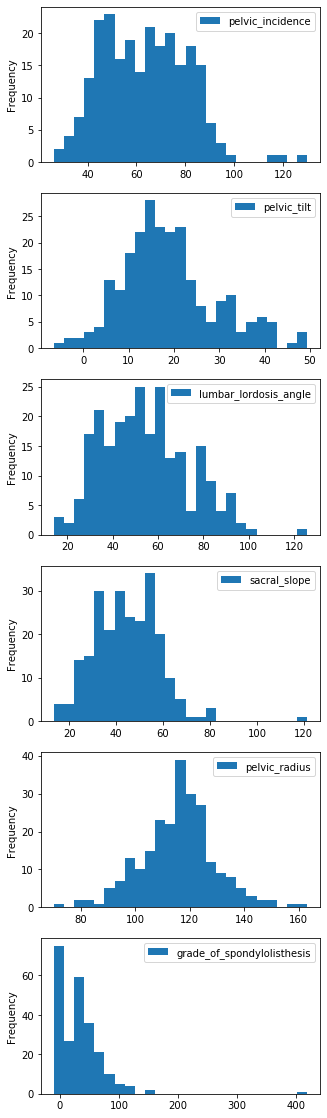

In [8]:
fig, axes = plt.subplots(df.shape[1] - 1, figsize=(5,20))
for i, c in enumerate(df.columns[:-1]):
    df[c].plot.hist(ax=axes[i], bins=25, label=c, legend=True)

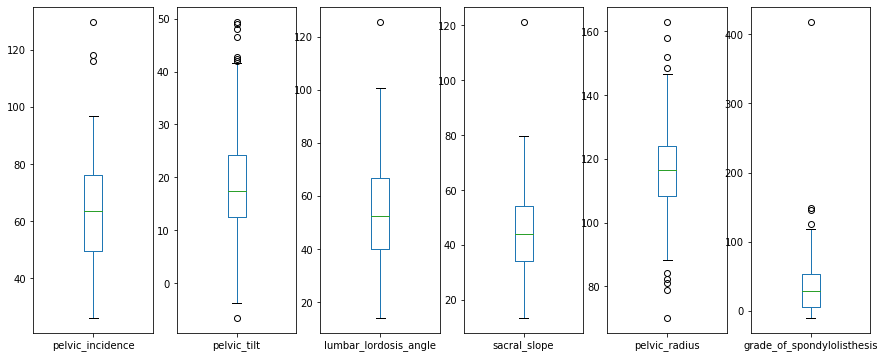

In [9]:
fig, axes = plt.subplots(1, df.shape[1] - 1, figsize=(15,6))
for i, c in enumerate(df.columns[:-1]):
    df[c].plot.box(ax=axes[i])

## Visualizing 2 dimensions together

In [10]:
def scatterplot(x,y,data,hue):
    sns.scatterplot(data=data, x=x, y=y, hue=hue)


In [11]:
cols = df.columns[:-1].to_list()

In [12]:
interact(
    scatterplot,
    x=cols, 
    y=cols,
    data=fixed(df), 
    hue=fixed('is_outlier'),
);

interactive(children=(Dropdown(description='x', options=('pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_a…

# Dimension reduction

## Principal Component Analysis

In [275]:
from sklearn.decomposition import PCA

In [276]:
pca = PCA(n_components=2, whiten=False)

In [277]:
pca.fit(X=df[cols])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [278]:
pca.explained_variance_ratio_

array([0.71109082, 0.13183641])

In [279]:
df_reduced = pd.DataFrame(
    pca.transform(X=df[cols]),
    columns=['first_component', 'second_component']
)
df_reduced['is_outlier'] = df.is_outlier

In [280]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
first_component     240 non-null float64
second_component    240 non-null float64
is_outlier          240 non-null uint8
dtypes: float64(2), uint8(1)
memory usage: 4.1 KB


In [281]:
df_reduced.head()

,first_component,second_component,is_outlier
0,-34.788082,-10.649573,0
1,-45.399574,21.689129,0
2,-31.575608,-20.818375,0
3,-20.351136,-12.000481,0
4,-36.148706,9.994392,0


In [282]:
df_reduced.tail()

,first_component,second_component,is_outlier
235,-30.941522,-12.563297,1
236,-38.946249,9.357338,1
237,-44.603407,-1.625344,1
238,-46.610787,8.741820,1
239,-16.073364,-13.857314,1


### Visualization

In [283]:
%matplotlib qt
sns.scatterplot(data=df_reduced, x='first_component', y='second_component', hue='is_outlier')

### Searching for the best number of component

In [267]:
from sklearn.decomposition import PCA, KernelPCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [94]:


tuned_parameters = [
    {'n_components': range(2,7), 'whiten':[True, False]},
]

clf = GridSearchCV(
    PCA(), 
    tuned_parameters, 
    cv=10,
    return_train_score=True
)

clf.fit(X=df[cols])

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=PCA(copy=True, iterated_power='auto', n_components=None,
                           random_state=None, svd_solver='auto', tol=0.0,
                           whiten=False),
             iid='warn', n_jobs=None,
             param_grid=[{'n_components': range(2, 7),
                          'whiten': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [95]:
clf.best_params_

{'n_components': 6, 'whiten': False}

In [99]:
pd.DataFrame.from_records(clf.cv_results_).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.00372026,0.00338264,0.00225871,0.00216336,0.00176241,0.00547338,0.00247726,0.000299096,0.00390742,0.00336215
mean_score_time,0.00186486,0.00238035,0.00121894,0.00101335,0.00128937,9.9802e-05,0.00344236,0.00156362,0.0024353,0.00108025
mean_test_score,-30.9599,-25.4986,-32.3957,-25.1661,-34.1528,-25.2238,-28.3566,-17.5278,-88433.3,-17.5278
mean_train_score,-30.089,-24.5541,-31.879,-24.2789,-33.4792,-24.1301,-28.3035,-16.7224,-75590,-16.7224
param_n_components,2,2,3,3,4,4,5,5,6,6
param_whiten,True,False,True,False,True,False,True,False,True,False
params,"{'n_components': 2, 'whiten': True}","{'n_components': 2, 'whiten': False}","{'n_components': 3, 'whiten': True}","{'n_components': 3, 'whiten': False}","{'n_components': 4, 'whiten': True}","{'n_components': 4, 'whiten': False}","{'n_components': 5, 'whiten': True}","{'n_components': 5, 'whiten': False}","{'n_components': 6, 'whiten': True}","{'n_components': 6, 'whiten': False}"
rank_test_score,7,5,8,3,9,4,6,2,10,1
split0_test_score,-29.0444,-23.403,-31.2613,-23.163,-33.1662,-23.0143,-28.5334,-15.8097,-62997.8,-15.8097
split0_train_score,-30.2854,-24.742,-32.1285,-24.4572,-33.759,-24.3147,-28.5992,-16.8756,-71469.8,-16.8756


### Factor analysis

In [269]:


tuned_parameters = [
    {'n_components': range(2,7)},
]

clf = GridSearchCV(
    FactorAnalysis(), 
    tuned_parameters, 
    cv=10,
    return_train_score=True
)

clf.fit(X=df[cols])

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=FactorAnalysis(copy=True, iterated_power=3,
                                      max_iter=1000, n_components=None,
                                      noise_variance_init=None, random_state=0,
                                      svd_method='randomized', tol=0.01),
             iid='warn', n_jobs=None,
             param_grid=[{'n_components': range(2, 7)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [270]:
clf.best_params_

{'n_components': 4}

In [271]:
df_reduced=pd.DataFrame(
    clf.transform(X=df[cols])
)
df_reduced['is_outlier'] = df.is_outlier

In [273]:
%matplotlib inline

interact(
    scatterplot,
    x=df_reduced.columns[:-1],
    y=df_reduced.columns[:-1],
    hue=fixed('is_outlier'),
    data=fixed(df_reduced)
)

interactive(children=(Dropdown(description='x', options=(0, 1, 2, 3), value=0), Dropdown(description='y', opti…

<function __main__.scatterplot(x, y, data, hue)>

## Kernel PCA

In [350]:
clf = KernelPCA(n_components=2, kernel='rbf', gamma=50)

clf.fit(X=df[cols])

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=50, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [351]:
df_reduced=pd.DataFrame(
    clf.transform(X=df[cols])
)
df_reduced['is_outlier'] = df.is_outlier

In [352]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
0             240 non-null float64
1             240 non-null float64
is_outlier    240 non-null uint8
dtypes: float64(2), uint8(1)
memory usage: 4.1 KB


In [353]:
df_reduced.head()

,0,1,is_outlier
0,-0.139140,0.136534,0
1,0.010553,-0.000073,0
2,0.031196,-0.065848,0
3,-0.034925,-0.075562,0
4,-0.102050,0.030186,0


In [354]:
df_reduced.tail()

,0,1,is_outlier
235,0.005082,-0.002350,1
236,0.001206,-0.001004,1
237,-0.001561,0.002130,1
238,0.016986,-0.016688,1
239,-0.007666,0.005899,1


In [355]:
%matplotlib qt
sns.scatterplot(
    x=0, 
    y=1,
    data=df_reduced, 
    hue='is_outlier',
)